For this project, I will be using the following three databases from imdb. 

imdb.title.basics,
imdb.title.ratings, and
bom.movie_gross



Import the tools needed for this project.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls

Jeff_eda.ipynb


Import the .csv files into Jupyter and create data frames

In [5]:
title_basics_df = pd.read_csv('../../data/imdb.title.akas.csv.gz')

In [6]:
title_basics_df

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [7]:
title_ratings_df = pd.read_csv('../../data/imdb.title.ratings.csv.gz')

In [8]:
title_ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')

In [10]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
!ls ../../data

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


# Data Investigation


What's genre is the most popular? (Where do I find genre?)
What regions are listed and which ones should I use? (USA, Asia, Europe?)
What are the highest grossing films in each region and what if anything do they have in common?
Maybe sort by orininal content such as Netflix originals, Amazon, Apple to narrow the research. 
Demographics?

In [12]:
!ls

Jeff_eda.ipynb


Review each tables information such as columns names, non-nulls, data types etc.

In [13]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [14]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Review the head of each df to get a general idea of the content.

In [34]:
title_basics_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [35]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [36]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Look at the regions column to determing what/which region to focus on.

In [22]:
title_basics_df['region'].unique()

array(['BG', 'JP', 'BR', 'FR', 'GR', 'IT', 'HR', 'IL', 'MX', 'EE', 'SE',
       'US', 'DE', 'XWW', 'LV', 'PT', 'RU', 'CZ', 'CA', 'CL', 'RO', 'LT',
       'FI', 'PE', 'TR', 'NO', 'SI', 'UA', 'VN', 'DK', 'RS', 'SK', nan,
       'ES', 'HU', 'PL', 'AZ', 'GE', 'UY', 'AR', 'GB', 'IN', 'CO', 'AU',
       'IE', 'AT', 'CN', 'KR', 'BA', 'VE', 'CH', 'DO', 'XEU', 'NL', 'BO',
       'JM', 'IR', 'XSA', 'MK', 'ID', 'TW', 'PH', 'TH', 'HK', 'PR', 'BE',
       'CU', 'AL', 'AN', 'EG', 'SG', 'IS', 'QA', 'NZ', 'AM', 'TN', 'MY',
       'SD', 'ZW', 'PS', 'MN', 'NG', 'SV', 'MA', 'BZ', 'UZ', 'AE', 'KP',
       'GH', 'PA', 'LU', 'ZA', 'CD', 'NP', 'LB', 'IQ', 'MH', 'EC', 'JO',
       'SN', 'BY', 'ET', 'PK', 'KZ', 'GP', 'ME', 'LK', 'DZ', 'VI', 'HN',
       'KH', 'CY', 'BD', 'AF', 'GT', 'XNA', 'CSHH', 'TT', 'SUHH', 'BH',
       'CV', 'PG', 'GU', 'TZ', 'MU', 'CR', 'PY', 'XKV', 'UG', 'AW', 'XAS',
       'BT', 'KE', 'SL', 'MD', 'RW', 'SY', 'BS', 'HT', 'MG', 'LA', 'MO',
       'MM', 'MW', 'SZ', 'AO', 'CG', 'KG', 'LR',

Look at unique studios for Netflix, Amazon, Disney, Apple etc. (unfortunately only Amazon is avaialable so I will not use 'studio' as a filter.

In [23]:
movie_gross_df['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

Looks at shape to know how many rows and columns I'm working with.

In [38]:
title_basics_df.shape

(331703, 8)

In [39]:
title_ratings_df.shape

(73856, 3)

In [40]:
movie_gross_df.shape

(3387, 5)

Look at years available.

In [28]:
movie_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

I decided to focus on the last five years available to keep it relevent and reduce some of the data.

In [33]:
movie_gross_df.loc[movie_gross_df['year']>= 2014]

,title,studio,domestic_gross,foreign_gross,year
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000,2014
1478,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014
1479,Guardians of the Galaxy,BV,333200000.0,440200000,2014
1480,Maleficent,BV,241400000.0,517100000,2014
1481,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,418200000,2014
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Further whittling it down to US based films for presentation to MSFT. Will suggest or assume a first launch in US.

In [25]:
title_basics_df.loc[title_basics_df['region']=='US']

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


Trying to see what 'types' represents. Doesn't look like 'original' corrresponds to original content produced by studios such as Netflix, so I will not use 'types'.

In [26]:
title_basics_df['types'].unique()

array([nan, 'imdbDisplay', 'working', 'original', 'alternative', 'video',
       'dvd', 'tv', 'festival', 'dvd\x02imdbDisplay',
       'festival\x02working'], dtype=object)

I am starting to think about what to merge and how to do it. I notice that the title_id column in basics and the tconst in ratings appear to be the same values. So I am going to chane the name of the tconst column to title_id.

In [41]:
title_ratings_df.rename(columns ={'tconst':'title_id'}, inplace=True)

In [42]:
title_ratings_df

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Now I want to merge title_basics and title_ratings dataframes.

I will start by isolating the US based films and them merge with ratings df by 'title_id'.

In [43]:
basics_US = title_basics_df.loc[title_basics_df['region']=='US']

In [44]:
basics_US

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


In [45]:
title_ratings = title_ratings_df

In [46]:
title_ratings

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [47]:
basics_US_and_title_ratings = pd.merge(basics_US, title_ratings)

In [48]:
basics_US_and_title_ratings

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0,7.0,539338
1,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338
2,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0,7.0,539338
3,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0,7.0,539338
4,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0,7.0,539338
...,...,...,...,...,...,...,...,...,...,...
30189,tt9080630,5,Girl/Girl Scene - The Movie,US,NaN,alternative,NaN,0.0,2.1,112
30190,tt9310460,2,Coconut The Little Dragon Into The Jungle,US,NaN,working,NaN,0.0,5.9,43
30191,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0,5.9,43
30192,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0,6.8,628


Now I will merge with movie_gross df.

In [51]:
movie_gross = movie_gross_df

In [52]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [53]:
basics_US_and_title_ratings_and_movie_gross = pd.merge(basics_US_and_title_ratings, movie_gross)

In [54]:
basics_US_and_title_ratings_and_movie_gross

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015
1,tt0401729,2,John Carter,US,NaN,NaN,NaN,0.0,6.6,241792,BV,73100000.0,211100000,2012
2,tt1194173,9,The Bourne Legacy,US,NaN,NaN,NaN,0.0,6.7,268678,Uni.,113200000.0,162900000,2012
3,tt1219289,9,Limitless,US,NaN,NaN,NaN,0.0,7.4,492490,Rela.,79200000.0,82600000,2011
4,tt4597838,2,Limitless,US,NaN,NaN,NaN,0.0,6.7,10,Rela.,79200000.0,82600000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,tt3348730,23,Jigsaw,US,NaN,imdbDisplay,NaN,0.0,5.8,57184,LGF,38100000.0,64900000,2017
1810,tt3907314,1,The Iron Ministry,US,NaN,NaN,NaN,0.0,6.8,209,Icar.,3200.0,NaN,2015
1811,tt4651520,25,Bad Moms,US,NaN,imdbDisplay,NaN,0.0,6.2,100952,STX,113300000.0,70700000,2016
1812,tt5462602,17,The Big Sick,US,NaN,imdbDisplay,NaN,0.0,7.6,104008,LGF,42900000.0,13500000,2017


Look at last five years.

In [69]:
basics_US_and_title_ratings_and_movie_gross.loc[basics_US_and_title_ratings_and_movie_gross['year']>= 2014]

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015
13,tt1401669,2,The Little Bedroom,US,NaN,NaN,new title,0.0,6.9,184,CLS,7400.0,NaN,2014
19,tt1837709,9,Winter's Tale,US,NaN,NaN,NaN,0.0,6.2,49077,WB,12600000.0,18500000,2014
20,tt1860357,8,Deepwater Horizon,US,NaN,imdbDisplay,NaN,0.0,7.1,133303,LG/S,61400000.0,60400000,2016
21,tt1865545,5,Truth or Dare,US,NaN,working,NaN,0.0,4.3,1125,Uni.,41400000.0,53900000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,tt3348730,23,Jigsaw,US,NaN,imdbDisplay,NaN,0.0,5.8,57184,LGF,38100000.0,64900000,2017
1810,tt3907314,1,The Iron Ministry,US,NaN,NaN,NaN,0.0,6.8,209,Icar.,3200.0,NaN,2015
1811,tt4651520,25,Bad Moms,US,NaN,imdbDisplay,NaN,0.0,6.2,100952,STX,113300000.0,70700000,2016
1812,tt5462602,17,The Big Sick,US,NaN,imdbDisplay,NaN,0.0,7.6,104008,LGF,42900000.0,13500000,2017


What are the ratings in 'ratings' column. I want to see what would be considered a "high" rating.

In [58]:
basics_US_and_title_ratings_and_movie_gross['averagerating'].unique()

array([7. , 6.6, 6.7, 7.4, 7.6, 6.2, 6. , 5.7, 7.1, 6.9, 7.2, 4.8, 5.4,
       5.9, 7.5, 4.3, 5.2, 6.3, 6.5, 7.9, 6.4, 6.1, 5. , 5.1, 5.6, 7.7,
       8.3, 2.6, 5.3, 5.5, 4.4, 3. , 4. , 7.3, 5.8, 6.8, 4.2, 8.1, 4.5,
       8.8, 8.2, 8. , 8.6, 3.8, 4.6, 8.9, 3.9, 4.1, 3.6, 4.9, 7.8, 8.4,
       1.6, 9. , 3.7, 3.5, 4.7, 8.5, 2.9, 9.2, 3.4, 2.4, 3.3, 1.9, 8.7,
       3.2])

In [68]:
basics_US_and_title_ratings_and_movie_gross.loc[basics_US_and_title_ratings_and_movie_gross['averagerating']> 6.0]

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015
1,tt0401729,2,John Carter,US,NaN,NaN,NaN,0.0,6.6,241792,BV,73100000.0,211100000,2012
2,tt1194173,9,The Bourne Legacy,US,NaN,NaN,NaN,0.0,6.7,268678,Uni.,113200000.0,162900000,2012
3,tt1219289,9,Limitless,US,NaN,NaN,NaN,0.0,7.4,492490,Rela.,79200000.0,82600000,2011
4,tt4597838,2,Limitless,US,NaN,NaN,NaN,0.0,6.7,10,Rela.,79200000.0,82600000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,tt3297330,12,Good Kill,US,NaN,NaN,NaN,0.0,6.4,21095,IFC,316000.0,NaN,2015
1810,tt3907314,1,The Iron Ministry,US,NaN,NaN,NaN,0.0,6.8,209,Icar.,3200.0,NaN,2015
1811,tt4651520,25,Bad Moms,US,NaN,imdbDisplay,NaN,0.0,6.2,100952,STX,113300000.0,70700000,2016
1812,tt5462602,17,The Big Sick,US,NaN,imdbDisplay,NaN,0.0,7.6,104008,LGF,42900000.0,13500000,2017


I am going to sort ascending by domestic gross. I want to see what the top ten domestic grossing films are and plot it.

In [73]:
basics_US_and_title_ratings_and_movie_gross.sort_values(by=['domestic_gross'], inplace=True, ascending=False)

In [87]:
plot_test = basics_US_and_title_ratings_and_movie_gross.head(10)

In [88]:
plot_test

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
987,tt2488496,39,Star Wars: The Force Awakens,US,NaN,NaN,poster title,0.0,8.0,784780,BV,936700000.0,"1,131.6",2015
614,tt1825683,16,Black Panther,US,en,NaN,NaN,0.0,7.3,516148,BV,700100000.0,646900000,2018
615,tt1825683,5,Black Panther,US,NaN,imdbDisplay,NaN,0.0,7.3,516148,BV,700100000.0,646900000,2018
1748,tt4154756,19,Avengers: Infinity War,US,NaN,NaN,NaN,0.0,8.5,670926,BV,678800000.0,"1,369.5",2018
1747,tt4154756,14,Avengers: Infinity War,US,en,NaN,NaN,0.0,8.5,670926,BV,678800000.0,"1,369.5",2018
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015
779,tt0848228,39,Marvel's The Avengers,US,NaN,NaN,complete title,0.0,8.1,1183655,BV,623400000.0,895500000,2012
620,tt2527336,43,Star Wars: The Last Jedi,US,en,NaN,NaN,0.0,7.1,462903,BV,620200000.0,712400000,2017
1567,tt3606756,32,Incredibles 2,US,NaN,NaN,NaN,0.0,7.7,203510,BV,608600000.0,634200000,2018
1682,tt3748528,40,Rogue One: A Star Wars Story,US,NaN,NaN,promotional title,0.0,7.8,478592,BV,532200000.0,523900000,2016


Just practicing some basic plotting...

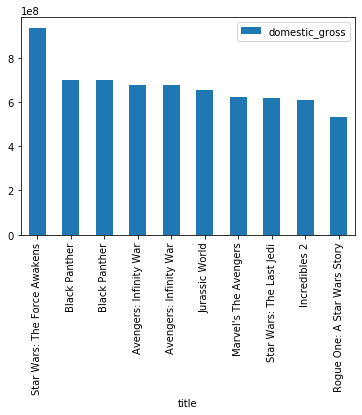

In [93]:
plot_test.plot(kind='bar',x='title',y='domestic_gross')
plt.show()

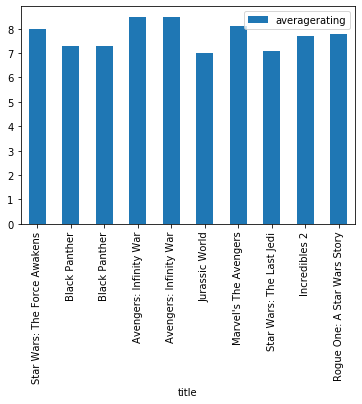

In [94]:
plot_test.plot(kind='bar',x='title',y='averagerating')
plt.show()

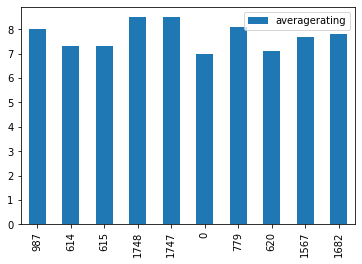

In [101]:
axis = plot_test[['title', 'averagerating']].plot(kind="bar", stacked =True)

fig = axis.get_figure()

I want to explore whether a higher average rating which I have definded as 6 or above also has a higher domestic_gross.